## Going through torch.utils.tensorboard



To log data for visualization by Tensorboard we use SummaryWriter class.

To instantiate SummaryWriter :

```python
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()
```

Lets read data from the dataset and log it into the tensorboard.

In [48]:
import torch
import torch.utils
import torchvision
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

# lets create a writer object
writer = SummaryWriter()
transform = transforms.Compose([
    transforms.Resize((100,100)),
    transforms.ToTensor()
    ])

train_data = datasets.FashionMNIST( 
    root= '../data' ,
    train= True,
    download= True,
   transform = transform
)

trainloader = DataLoader(train_data, batch_size = 20 , shuffle = True)

Now lets get the first batch of our data. 

In [49]:
first_batch = next(iter(trainloader))

first_batch has two parts, one is the image data and another is the label 

In [50]:
images = first_batch[0]
labels = first_batch[1]

the data loader returns tuple of image and list , so we can directly assign them such as :

In [51]:
first_batch_images , first_batch_labels = next(iter(trainloader))

Text(0.5, 1.0, 'tensor(6)')

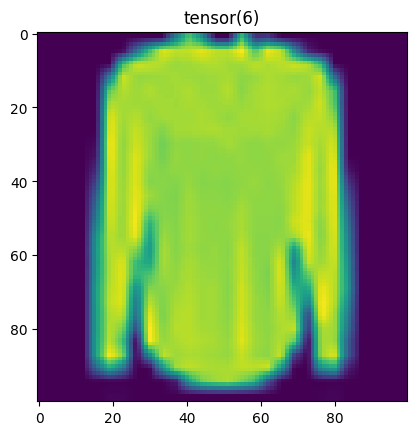

In [52]:
import matplotlib.pyplot as plt
plt.imshow( first_batch_images[0].permute(1,2,0))
plt.title(first_batch_labels[0])

In [53]:
first_batch_images.shape

torch.Size([20, 1, 100, 100])

In [55]:
### Adding image grid into the tensorboard graph.
grid = torchvision.utils.make_grid(first_batch_images)
grid.shape

torch.Size([3, 308, 818])

In [56]:
writer.add_image('images', grid, 0)  
writer.close()

![image_graph](./image/image_graph.png)

Lets look at some parameters of the `SummaryWriter` :

* `log_dir(str)` : Save directory location
* `comment(str)` : Suffix that will added to `log_dir`
* `max_queue (int)` : Size of the queue for pending events and summaries before one of the ‘add’ calls forces a flush to disk. Default is ten items.
* `flush_secs (int)` : Often time to log data. Default is every two minutes.


In [61]:
writer = SummaryWriter()

> folder_location of log data : runs/Jun12_10-29-11_nitroV

In [62]:
writer = SummaryWriter("log_data")

> folder_location of log data : log_data

In [66]:
writer = SummaryWriter(comment= "Try1")

> folder_location of log data : runs/Jun12_10-33-48_nitroVTry1

## Grouping plots together

There will be a lot of data that will be generated in an experiment. So , to present information in a proper way and avoid cluttering we can group plots and name them hierrarchically.

### Adding Scalar Data

```python
writer.add_scalar('Tag' , scalar_value = scalar_data , global_step = current_count_step )
```

In [59]:
from torch.utils.tensorboard import SummaryWriter
import numpy as np

writer = SummaryWriter()

for n_iter in range(100):
    writer.add_scalar('Group1/data1', np.random.random(), n_iter)
    writer.add_scalar('Group1/data2', np.random.random(), n_iter)
    writer.add_scalar('Group2/data1', np.random.random(), n_iter)
    writer.add_scalar('Group2/data2', np.random.random(), n_iter)

![grouped_data](./image/grouped_data.png)

### Adding Scalars Data

```python
writer.add_scalars(main_tag, tag_scalar_dict, global_step=None, walltime=None)
```

`main_tag(str) `: The parent name for the tags  
`tag_scalar_dict(dict)` : Multiple Data, in the format Key-value pair ( dictionary)  
`global_step(int)` : Global step value to record  

In [67]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()
r = 5
for i in range(100):
    writer.add_scalars('scalars_data', {'xsinx':i*np.sin(i/r),
                                    'xcosx':i*np.cos(i/r),
                                    'tanx': np.tan(i/r)}, i)
writer.close()

![scalars_data](./image/scalars_data.png)

### Adding Histograms

```python
writer.add_histogram('Tag', data, global_step , bins)
```

`tag (str)` – Data identifier

`values `(torch.Tensor, numpy.ndarray, or string/blobname) – Values to build histogram

`global_step (int) `– Global step value to record

`bins (str)` – One of {‘tensorflow’,’auto’, ‘fd’, …}. This determines how the bins are made

In [69]:
from torch.utils.tensorboard import SummaryWriter
import numpy as np
writer = SummaryWriter()
for i in range(10):
    x = np.random.random(1000)
    writer.add_histogram('distribution centers', x + i, i)
writer.close()

![histogram](./image/histograms_tensorboard.png)

### Adding Image :

```python
writer.add_image( 'tag', img_tensor , global_step , dataformats)
```
dataformats : Image data format specification of the form CHW, HWC, HW, WH, etc. 

Where `H` refers to `height`, `W` refers to `width` and `C` refers to `channel`.


### Adding Images :

Add batched image data to summary. Requires `pillow` package.

```python
writer.add_image( 'tag', img_tensor , global_step , dataformats)
```
dataformats (str) – Image data format specification of the form NCHW, NHWC, CHW, HWC, HW, WH, etc.

Where `H` refers to `height`, `W` refers to `width`, `N`refers to number of images in batch and `C` refers to `channel`

Similarly there are various logging methods such as :

### Adding figure

Render matplotlib figure into an image and add it to summary.

```python
add_figure(tag, figure, global_step=None, close=True, walltime=None)
```
figure (Union[Figure, List[Figure]]) – Figure or a list of figures

close (bool) – Flag to automatically close the figure


### Adding text
```python
writer.add_text('lstm', 'This is an lstm', 0)
writer.add_text('rnn', 'This is an rnn', 10)
```

### Adding Graph

Add graph data to summary.
```python
add_graph(model, input_to_model=None, verbose=False, use_strict_trace=True)
```

Parameters

        model (torch.nn.Module) – Model to draw.

        input_to_model (torch.Tensor or list of torch.Tensor) – A variable or a tuple of variables to be fed.

        verbose (bool) – Whether to print graph structure in console.

        use_strict_trace (bool) – Whether to pass keyword argument strict to torch.jit.trace. Pass False when you want the tracer to record your mutable container types (list, dict)




In [70]:
import torch
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter

# Define a simple neural network model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(10, 50)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initialize the model
model = SimpleModel()

# Create a dummy input tensor with the same shape as the input data
dummy_input = torch.randn(1, 10)

# Initialize SummaryWriter for TensorBoard
writer = SummaryWriter()

# Add the model graph to TensorBoard
writer.add_graph(model, input_to_model=dummy_input, verbose=False, use_strict_trace=True)

# Close the writer
writer.close()


![model_graph](./image/model_graph.png)